# Data challenge


7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

In [177]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
import io
%matplotlib inline

colNames = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size',
          'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
          'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

cdat = pd.read_csv('breast-cancer-wisconsin_withoutQuestionmarkLines.data', header=None, names=colNames)
cdat.head()


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [178]:
# show all duplicate sample codes
cdat[cdat.duplicated(keep=False)]
# drop duplicates
cleanData=cdat.drop_duplicates()
cleanData.head()
X=cleanData.ix[:,0:-1]
y=cleanData.ix[:,-1]
X.head()
# y.head()


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [141]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=123)

## Fix class imbalance
from unbalanced_dataset.over_sampling import RandomOverSampler
from unbalanced_dataset.over_sampling import SMOTE #Synthetic Minority Over-sampling Technique
# 'SMOTE'
smote = SMOTE(ratio='auto', verbose=False, kind='regular')
SMO_X_train_temp, SMO_y_train_temp = smote.fit_transform(X_train, y_train)
SMO_X_train, SMO_y_train = smote.fit_transform(SMO_X_train_temp, SMO_y_train_temp)

# Create Random Forest object
model= RandomForestClassifier(n_estimators=200)
# Train the model using the training sets and check score
model.fit(SMO_X_train,SMO_y_train)
# Predict Output
y_predicted = model.predict(X_test)

n_samples = X.shape[0]
cv = cross_validation.ShuffleSplit(n_samples, n_iter=4, test_size=0.25, random_state=777)
crossValScore = cross_validation.cross_val_score(model, X, y, cv=cv)

print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))
print 'Test size = '+str(test_size)
pd.crosstab(y_test, y_predicted, rownames=['actual'], colnames=['preds'])

pBenign = float(sum(y_train == 2))/len(y_train)*100
pMalignant = float(sum(y_train == 4))/len(y_train)*100
pBenignSMO = float(sum(SMO_y_train == 2))/len(SMO_y_train)*100
pMalignantSMO = float(sum(SMO_y_train == 4))/len(SMO_y_train)*100
print 'Class balance: %d%% / %d%%' % (pBenign,pMalignant)
print 'after oversampling (SMOTE)'
print 'Class balance: %d%% / %d%%' % (pBenignSMO,pMalignantSMO)

print 'Classifier score='+str(model.score(X_test, y_test))
print 'Cross-validation score='+str(crossValScore)
pd.crosstab(y_test, y_predicted, rownames=['actual'], colnames=['preds'])

Training/Test Ratio: 2
Test size = 0.25
Class balance: 65% / 34%
after oversampling (SMOTE)
Class balance: 50% / 50%
Classifier score=0.96449704142
Cross-validation score=[ 0.9704142   0.9704142   0.98224852  0.97633136]


preds,2.0,4.0
actual,,
2,106,4
4,2,57


             precision    recall  f1-score   support

          2       0.98      0.98      0.98        88
          4       0.96      0.96      0.96        47

avg / total       0.97      0.97      0.97       135

 
Confusion matrix, without normalization
[[86  2]
 [ 2 45]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.04  0.96]]


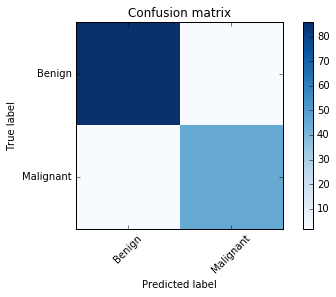

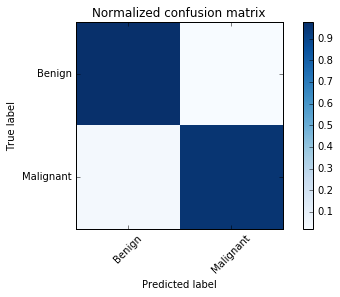

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0,1]
    plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
print classification_report(y_test, y_predicted)
print ' '
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

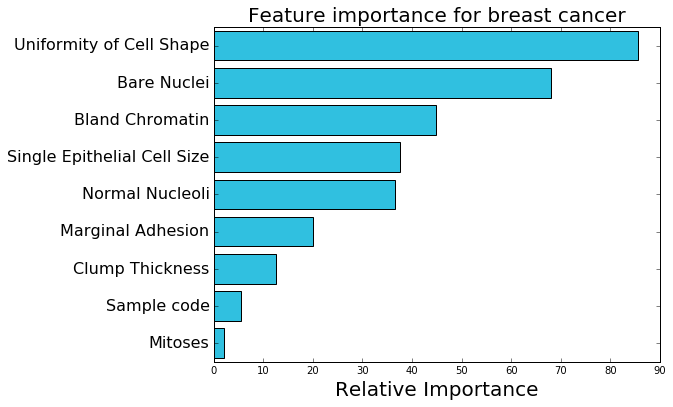

In [148]:
# Get Feature Importance from the classifier
numBars = 9
feature_importance = model.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 6))
plt.barh(pos[len(pos)-numBars-1:-1], feature_importance[sorted_idx][len(pos)-numBars-1:-1], align='center', color='#30C0E0')
plt.yticks(pos[len(pos)-numBars-1:-1], np.asanyarray(colNames)[sorted_idx][len(pos)-numBars-1:-1],fontsize = 16)
plt.xlabel('Relative Importance',fontsize = 20)
plt.title('Feature importance for breast cancer',fontsize = 20)
# plt.show()

# Sigmoid calibration

In [152]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

## Fix class imbalance
from unbalanced_dataset.over_sampling import RandomOverSampler
from unbalanced_dataset.over_sampling import SMOTE #Synthetic Minority Over-sampling Technique
# 'SMOTE'
smote = SMOTE(ratio='auto', verbose=False, kind='regular')
SMO_X_temp, SMO_y_temp = smote.fit_transform(X_train_valid, y_train_valid)
SMO_X_train_valid, SMO_y_train_valid = smote.fit_transform(SMO_X_temp, SMO_y_temp)

# separate validation/test data
split = int(len(SMO_X_train_valid)*0.2)
X_train = SMO_X_train_valid[:split]
X_valid = SMO_X_train_valid[split:]
y_train = SMO_y_train_valid[:split]
y_valid = SMO_y_train_valid[split:]

# Train uncalibrated random forest classifier on whole train and validation data and evaluate on test data
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
y_predicted = sig_clf.predict(X_test)
score = log_loss(y_test, clf_probs)

# Train random forest classifier, calibrate on validation data and evaluate on test data
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(X_valid, y_valid)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_y_predicted = sig_clf.predict(X_test)
sig_score = log_loss(y_test, sig_clf_probs)


print "Log-loss of"
print " * uncalibrated classifier trained on %d datapoints: %.3f "\
    %(len(X_train_valid), score)
print " * classifier trained on %d datapoints and calibrated on %d datapoint: %.3f"\
    %(len(X_train),len(X_valid),sig_score)
    
print classification_report(y_test, y_predicted)



Log-loss of
 * uncalibrated classifier trained on 540 datapoints: 0.077 
 * classifier trained on 140 datapoints and calibrated on 562 datapoint: 0.101
             precision    recall  f1-score   support

          2       0.98      0.98      0.98        88
          4       0.96      0.96      0.96        47

avg / total       0.97      0.97      0.97       135



# Probability calibration

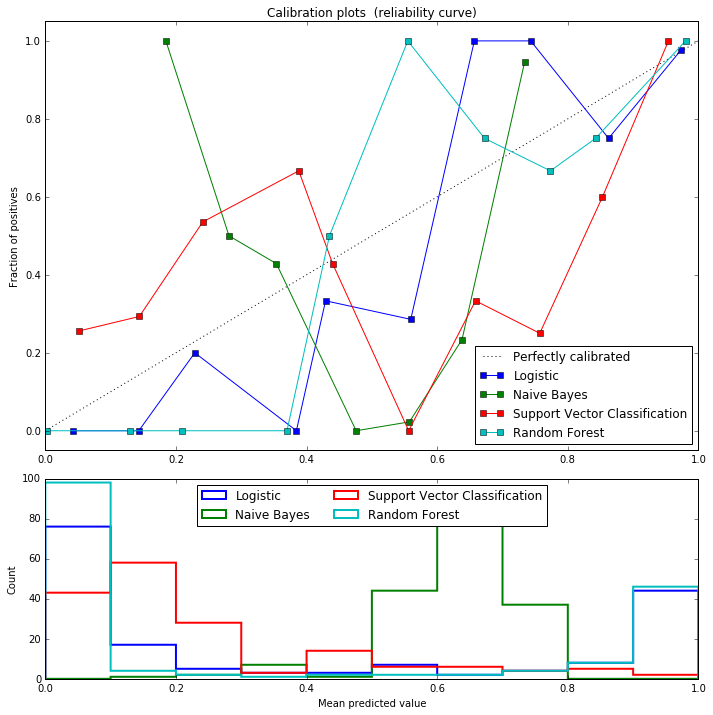

In [157]:


import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=123)

## Fix class imbalance
from unbalanced_dataset.over_sampling import RandomOverSampler
from unbalanced_dataset.over_sampling import SMOTE #Synthetic Minority Over-sampling Technique
# 'SMOTE'
smote = SMOTE(ratio='auto', verbose=False, kind='regular')
SMO_X_train_temp, SMO_y_train_temp = smote.fit_transform(X_train, y_train)
SMO_X_train, SMO_y_train = smote.fit_transform(SMO_X_train_temp, SMO_y_train_temp)


# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)


###############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(SMO_X_train, SMO_y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Out of bag error 

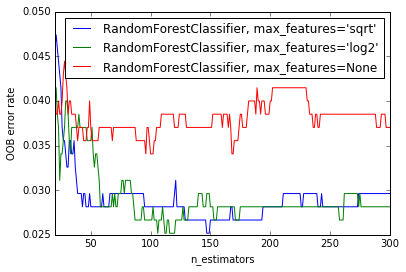

In [161]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt")),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Compare classifiers

Classifier: Nearest Neighbors, score=0.579881656805
             precision    recall  f1-score   support

          2       0.69      0.65      0.67       110
          4       0.41      0.46      0.43        59

avg / total       0.59      0.58      0.58       169

Classifier: Linear SVM, score=0.644970414201
             precision    recall  f1-score   support

          2       0.66      0.92      0.77       110
          4       0.47      0.14      0.21        59

avg / total       0.60      0.64      0.58       169

Classifier: RBF SVM, score=0.366863905325
             precision    recall  f1-score   support

          2       1.00      0.03      0.05       110
          4       0.36      1.00      0.52        59

avg / total       0.77      0.37      0.22       169

Classifier: Decision Tree, score=0.958579881657
             precision    recall  f1-score   support

          2       0.97      0.96      0.97       110
          4       0.93      0.95      0.94        59

avg / t

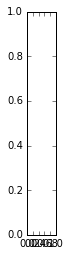

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# split data
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=123)

## Fix class imbalance
from unbalanced_dataset.over_sampling import RandomOverSampler
from unbalanced_dataset.over_sampling import SMOTE #Synthetic Minority Over-sampling Technique
# 'SMOTE'
smote = SMOTE(ratio='auto', verbose=False, kind='regular')
SMO_X_train_temp, SMO_y_train_temp = smote.fit_transform(X_train, y_train)
SMO_X_train, SMO_y_train = smote.fit_transform(SMO_X_train_temp, SMO_y_train_temp)


# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(SMO_X_train, SMO_y_train)
    score = clf.score(X_test, y_test)
    y_predicted = clf.predict(X_test)
    print 'Classifier: '+str(name)+', score='+str(score)
    print classification_report(y_test, y_predicted)

   

